In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u

In [2]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
filename2='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/energyNotrace/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()
coll_tot=ca.NPYreader(filename2,False).get_event()

<IPython.core.display.Javascript object>


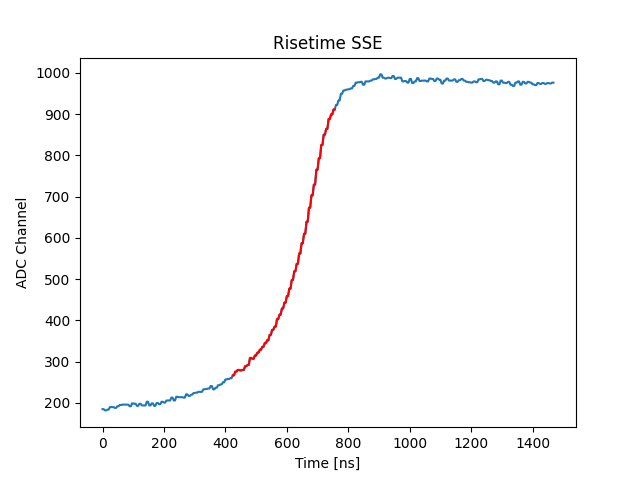

Text(0, 0.5, 'ADC Channel')

In [3]:
traces=coll.get_traces()
plt.figure()

time=np.arange(0,len(traces[0]),1)*4
plt.plot(time,traces[0,:])

plt.title('Risetime SSE')
plt.xlabel('Time [ns]',loc='center')
plt.ylabel('ADC Channel',loc='center')

In [4]:
rtobj=u.rise_time()
print('SSE rise time: '+str(rtobj.compute_rt(traces[0],4))+' ns')
plt.plot(time[rtobj.i_min : rtobj.i_max],traces[0][rtobj.i_min : rtobj.i_max],color='r')

SSE rise time: (336, (106, 190)) ns


<IPython.core.display.Javascript object>


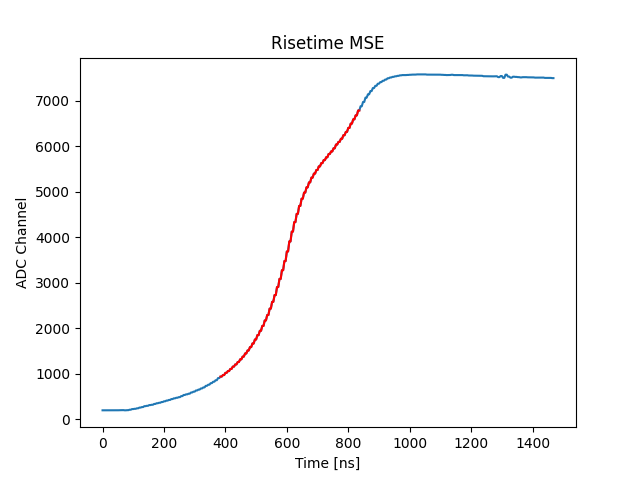

Text(0, 0.5, 'ADC Channel')

In [5]:
plt.figure()
time=np.arange(0,len(traces[8]),1)*4
plt.plot(time,traces[8,:])

plt.title('Risetime MSE')
plt.xlabel('Time [ns]',loc='center')
plt.ylabel('ADC Channel',loc='center')

In [6]:
rtobj=u.rise_time()
print('MSE rise time: '+str(rtobj.compute_rt(traces[8],4))+' ns')
plt.plot(time[rtobj.i_min : rtobj.i_max],traces[8][rtobj.i_min : rtobj.i_max],color='r')

MSE rise time: (456, (96, 210)) ns


In [7]:
#Cut ae to see if between SSE and MSE persists a difference in risetime
coll1=coll_tot.subset('ae',0,1.6e-2)
coll2=coll_tot.subset('ae',1.90e-2,1.95e-2)

rt1=coll1.get_risetime()
rt2=coll2.get_risetime()

<IPython.core.display.Javascript object>


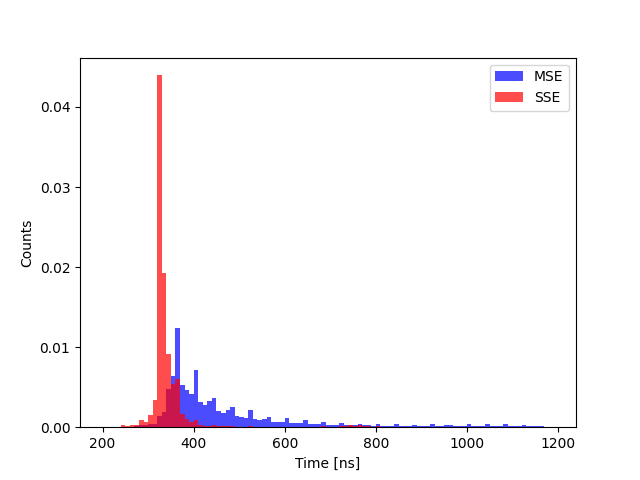

<IPython.core.display.Javascript object>


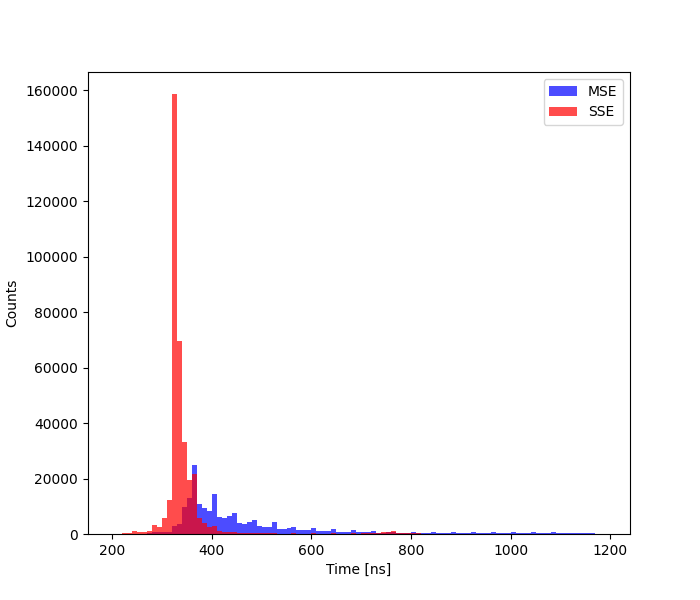

In [11]:
plt.figure()
bins=np.arange(200,1200,10)
plt.hist(rt1*1e9,color='b',alpha=0.7,bins=bins,density=True,label='MSE')
plt.hist(rt2*1e9,color='r',alpha=0.7,bins=bins,density=True,label='SSE')
plt.xlabel('Time [ns]')
plt.ylabel('Counts')

plt.legend()

#without normalization
plt.figure(figsize=(7,6))
plt.hist(rt1*1e9,color='b',alpha=0.7,bins=bins,label='MSE')
plt.hist(rt2*1e9,color='r',alpha=0.7,bins=bins,label='SSE')
plt.xlabel('Time [ns]')
plt.ylabel('Counts')
plt.legend()